# <img src="usil-logo.png" alt="Logo USIL" width=200 hight=400 align="right">


<br><br><br>
<h1><font color="#1D65DD" size=5>Minería de Datos</font></h1>



<h1><font color="#1D65DD" size=6>Artificial Neural Network (ANN)</font></h1>

<br>
<div style="text-align: right">
<font color="#1D65DD" size=3>Yuri Coicca, M.Sc.</font><br>
<font color="#1D65DD" size=3>Universidad San Ignacio de Loyola</font><br>
<font color="#1D65DD" size=3>Carrera de Ciencia de Datos</font><br>
</div>

In [1]:
# Simple MNIST NN from scratch (numpy, no TF/Keras)
# https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/notebook

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('digit-recognizer/train.csv')

In [3]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
Y_train

array([7, 3, 1, ..., 1, 4, 7], shape=(41000,))

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 7 7 ... 3 3 0] [7 3 1 ... 1 4 7]
0.11912195121951219
Iteration:  10
[5 0 7 ... 3 4 0] [7 3 1 ... 1 4 7]
0.22907317073170733
Iteration:  20
[5 0 7 ... 3 4 0] [7 3 1 ... 1 4 7]
0.3106829268292683
Iteration:  30
[5 0 1 ... 3 4 7] [7 3 1 ... 1 4 7]
0.36873170731707317
Iteration:  40
[8 0 1 ... 3 4 7] [7 3 1 ... 1 4 7]
0.42273170731707316
Iteration:  50
[8 0 1 ... 3 4 7] [7 3 1 ... 1 4 7]
0.47485365853658534
Iteration:  60
[8 0 1 ... 3 4 7] [7 3 1 ... 1 4 7]
0.5294878048780488
Iteration:  70
[8 3 1 ... 3 4 7] [7 3 1 ... 1 4 7]
0.565780487804878
Iteration:  80
[9 3 1 ... 3 4 7] [7 3 1 ... 1 4 7]
0.5975609756097561
Iteration:  90
[9 2 1 ... 1 4 7] [7 3 1 ... 1 4 7]
0.6256585365853659
Iteration:  100
[7 2 1 ... 1 4 7] [7 3 1 ... 1 4 7]
0.6498048780487805
Iteration:  110
[7 2 1 ... 1 4 7] [7 3 1 ... 1 4 7]
0.668609756097561
Iteration:  120
[7 2 1 ... 1 4 7] [7 3 1 ... 1 4 7]
0.6869268292682927
Iteration:  130
[7 2 1 ... 1 4 7] [7 3 1 ... 1 4 7]
0.7029512195121951
Iteration:  14

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


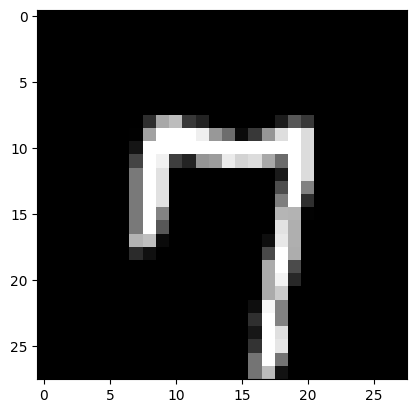

Prediction:  [3]
Label:  3


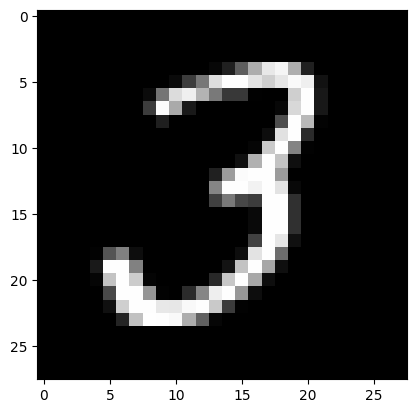

Prediction:  [1]
Label:  1


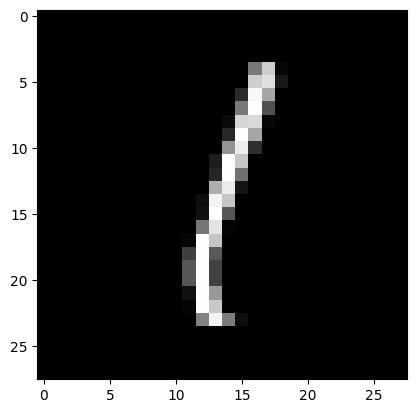

Prediction:  [3]
Label:  3


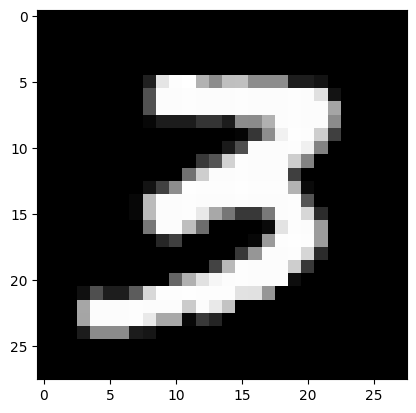

In [9]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [10]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 6 3 2 3 7 1 3 4 9 6 6 4 6 8 6 1 6 0 0 7 8 8 8 9 1 5 5 3 1 8 3 7 8 2 2 3
 8 9 3 7 2 5 5 3 1 5 0 0 5 0 9 2 4 0 6 8 9 1 2 3 6 6 3 6 1 7 5 4 3 6 3 9 1
 4 2 9 8 1 2 1 6 4 2 0 0 5 6 0 3 2 4 8 1 8 1 4 8 1 9 6 7 3 1 7 8 2 1 2 3 6
 5 4 8 7 1 7 6 0 3 1 8 9 6 9 1 6 1 8 8 6 6 0 4 4 9 1 4 5 4 1 8 4 9 0 4 4 1
 1 7 2 8 3 1 2 0 4 7 1 7 7 8 8 2 9 0 3 0 9 2 2 4 9 6 1 3 4 7 8 1 6 0 6 5 1
 6 1 3 6 9 6 7 9 3 8 1 0 0 8 2 3 2 6 1 1 1 8 4 1 8 3 7 5 6 1 4 0 5 9 9 6 5
 5 7 5 2 9 3 0 4 0 7 5 7 7 4 3 1 0 2 6 3 3 7 4 3 9 7 9 1 3 2 5 5 2 1 1 9 7
 2 4 7 9 8 1 0 8 9 9 0 8 4 9 5 7 8 5 4 1 8 7 7 1 2 1 5 8 4 4 3 0 0 4 6 1 5
 3 5 2 8 1 8 0 8 1 9 7 5 9 7 1 1 9 5 1 9 2 1 0 1 0 9 3 1 9 0 9 6 0 4 6 3 6
 5 5 8 3 2 1 7 3 3 0 9 4 3 0 5 4 6 1 9 5 2 3 2 3 2 2 1 1 1 8 6 5 4 0 9 3 1
 4 5 9 3 1 3 1 1 2 4 7 6 1 8 9 6 8 8 1 5 1 1 0 2 1 6 9 6 9 2 6 2 6 4 7 0 6
 6 7 2 6 3 3 3 1 9 3 2 7 6 9 7 5 3 4 3 4 5 9 7 8 8 8 6 1 9 5 8 5 7 1 4 1 1
 0 3 0 6 9 2 2 4 6 6 0 6 0 7 6 0 8 1 5 2 4 9 1 4 4 6 7 5 7 3 0 7 4 4 3 1 4
 1 5 3 8 3 4 4 7 3 9 3 5 

np.float64(0.853)

Iteration:  0
[1 1 9 ... 9 1 1] [4 4 7 ... 2 2 7]
0.08560975609756098
Iteration:  10
[4 1 9 ... 2 2 9] [4 4 7 ... 2 2 7]
0.13921951219512196
Iteration:  20
[4 4 9 ... 2 2 3] [4 4 7 ... 2 2 7]
0.22
Iteration:  30
[4 4 9 ... 2 2 7] [4 4 7 ... 2 2 7]
0.2862682926829268
Iteration:  40
[4 4 7 ... 2 2 2] [4 4 7 ... 2 2 7]
0.34685365853658534
Iteration:  50
[4 4 7 ... 2 2 2] [4 4 7 ... 2 2 7]
0.4045609756097561
Iteration:  60
[4 4 7 ... 2 2 7] [4 4 7 ... 2 2 7]
0.4584878048780488
Iteration:  70
[4 4 7 ... 2 2 7] [4 4 7 ... 2 2 7]
0.5020731707317073
Iteration:  80
[4 4 7 ... 2 2 7] [4 4 7 ... 2 2 7]
0.5379512195121952
Iteration:  90
[4 4 7 ... 2 2 7] [4 4 7 ... 2 2 7]
0.5696341463414634
Iteration:  100
[4 4 7 ... 2 2 7] [4 4 7 ... 2 2 7]
0.5967560975609756
Iteration:  110
[4 4 7 ... 2 2 7] [4 4 7 ... 2 2 7]
0.6213414634146341
Iteration:  120
[4 4 7 ... 2 2 7] [4 4 7 ... 2 2 7]
0.6415121951219512
Iteration:  130
[4 4 7 ... 2 2 7] [4 4 7 ... 2 2 7]
0.6613658536585366
Iteration:  140
[4 4 7 ... 2

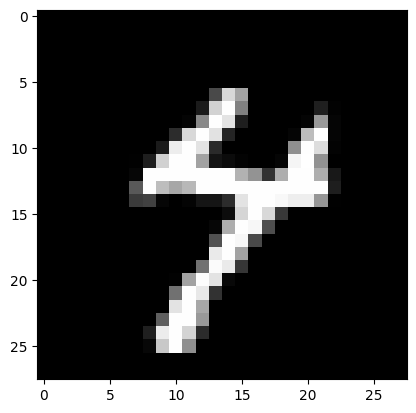

Prediction:  [4]
Label:  4


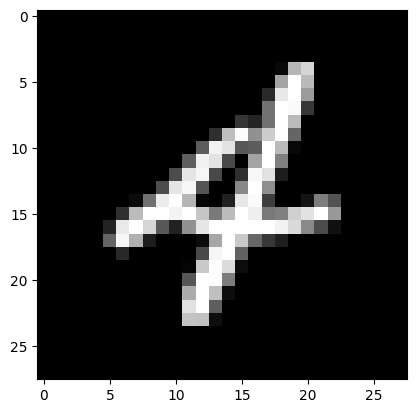

Prediction:  [7]
Label:  7


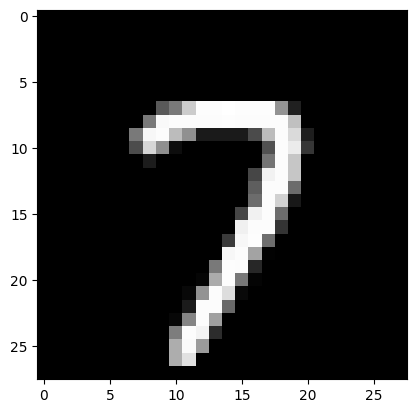

Prediction:  [5]
Label:  5


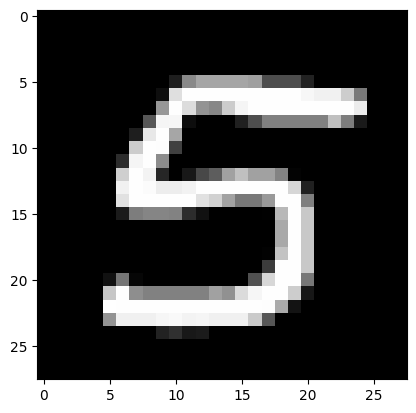

[0 7 0 3 2 1 5 0 6 2 2 9 7 2 0 0 4 7 0 7 8 1 6 8 6 9 6 7 3 1 6 8 3 6 5 3 1
 3 7 0 5 5 9 3 3 0 3 9 6 3 0 8 3 2 8 6 2 3 9 1 1 4 3 8 8 5 4 2 2 4 8 5 1 0
 7 4 2 7 3 1 5 6 9 1 9 8 3 9 0 1 9 3 3 6 2 7 6 3 8 7 9 6 3 0 3 3 2 2 5 4 2
 4 7 6 7 6 6 2 3 5 7 2 6 1 4 1 2 0 8 2 3 5 0 2 4 7 5 2 6 5 5 1 9 2 3 0 6 4
 8 2 8 0 1 7 0 1 9 5 0 9 0 7 0 7 9 2 0 1 2 7 2 9 3 3 1 3 9 8 5 8 4 5 5 3 4
 6 7 0 5 0 8 4 3 1 4 1 8 7 6 0 2 7 3 0 4 4 3 8 5 5 0 3 3 1 1 2 9 1 0 1 1 7
 1 6 8 3 4 4 6 9 3 1 7 8 8 8 5 7 8 9 8 6 8 3 9 9 8 7 4 2 5 8 0 2 7 1 4 3 4
 8 1 3 1 7 3 1 1 4 0 9 7 3 5 2 1 7 7 0 3 1 6 0 7 8 4 0 5 3 6 0 0 6 4 1 3 1
 9 8 8 7 1 3 8 5 8 8 6 9 4 0 3 6 7 8 4 6 1 6 1 4 4 5 3 1 1 3 3 9 4 0 7 6 9
 7 2 7 4 5 9 7 0 7 9 4 7 2 4 9 0 7 5 6 4 7 9 9 3 6 5 2 7 1 6 5 2 7 7 3 9 9
 7 9 7 4 7 1 0 7 5 2 6 9 5 9 7 6 4 4 8 5 9 0 4 5 5 5 9 4 3 5 4 1 2 9 9 7 7
 2 7 1 3 7 3 3 1 4 5 0 9 6 7 8 1 4 8 2 8 9 6 7 9 1 7 4 1 9 1 4 9 8 3 4 0 3
 2 5 8 8 9 8 5 8 5 1 8 1 3 5 6 4 6 2 5 2 2 5 6 4 9 6 3 1 1 0 8 0 6 4 9 2 9
 2 7 9 0 6 9 6 3 9 3 3 4 

np.float64(0.851)

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('digit-recognizer/train.csv')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)